In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

c:\Python Interpreters\in_advanced_python\Lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 38 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


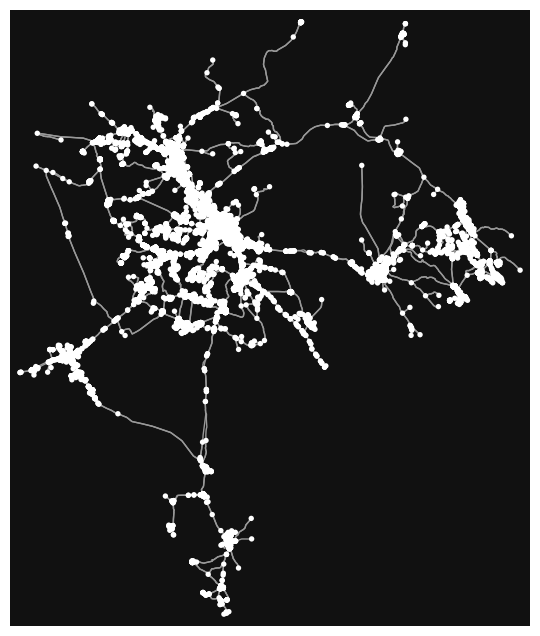

In [4]:
city_name = "Yazd, Iran"

G = ox.graph_from_place(city_name, network_type="drive")
ox.plot_graph(G)
ox.save_graphml(G, filepath="Yazd.graphml")

Node Labels:
OSM ID: 767988934, Label: 1
OSM ID: 1319139921, Label: 2
OSM ID: 1319140660, Label: 3
OSM ID: 1319140892, Label: 4
OSM ID: 1319144879, Label: 5
OSM ID: 1319147585, Label: 6
OSM ID: 5515303613, Label: 7
OSM ID: 5516188685, Label: 8
OSM ID: 5516188708, Label: 9
OSM ID: 5516304403, Label: 10
OSM ID: 6726765518, Label: 11
OSM ID: 6726765570, Label: 12
OSM ID: 6726765574, Label: 13
OSM ID: 6726765576, Label: 14
OSM ID: 6726782110, Label: 15
OSM ID: 6726782193, Label: 16
OSM ID: 6859251457, Label: 17
OSM ID: 6859292103, Label: 18
OSM ID: 11985957143, Label: 19
OSM ID: 11985957150, Label: 20

Edge Indices (based on node label sums):
Edge (17, 1): Index = 18
Edge (17, 18): Index = 35
Edge (17, 20): Index = 37
Edge (12, 6): Index = 18
Edge (12, 11): Index = 23
Edge (12, 16): Index = 28
Edge (13, 7): Index = 20
Edge (13, 16): Index = 29
Edge (14, 11): Index = 25
Edge (14, 15): Index = 29
Edge (8, 9): Index = 17
Edge (10, 4): Index = 14
Edge (19, 20): Index = 39
Edge (4, 6): Index = 

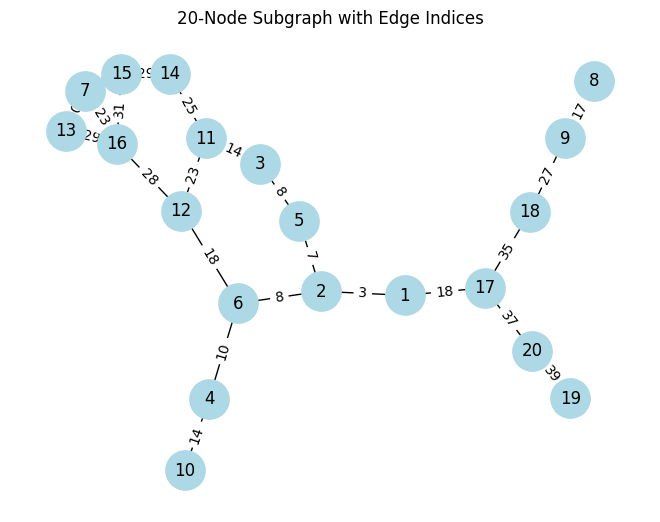

In [6]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the saved graph
G = ox.load_graphml("Yazd.graphml")

# Step 2: Convert to undirected
G_undirected = G.to_undirected()

# Step 3: Extract the largest connected component (to ensure connectivity)
components = list(nx.connected_components(G_undirected))
largest_component = max(components, key=len)
G_largest = G_undirected.subgraph(largest_component).copy()

# Step 4: Greedy selection of a dense 20-node connected subgraph
start_node = max(dict(G_largest.degree()).items(), key=lambda x: x[1])[0]
nodes_seen = set([start_node])
fringe = set(G_largest[start_node])

while len(nodes_seen) < 20 and fringe:
    next_node = max(fringe, key=lambda n: G_largest.degree(n))
    nodes_seen.add(next_node)
    fringe.update(G_largest[next_node])
    fringe -= nodes_seen

# If fewer than 20 nodes found, warn the user
if len(nodes_seen) < 20:
    print(f"Only found {len(nodes_seen)} connected nodes.")

subgraph = G_largest.subgraph(nodes_seen).copy()

# Step 5: Assign node labels from 1 to 20 based on sorted node IDs
sorted_nodes = sorted(subgraph.nodes())
node_label_map = {node_id: i + 1 for i, node_id in enumerate(sorted_nodes)}
subgraph_relabel = nx.relabel_nodes(subgraph, node_label_map, copy=True)

# Step 6: Assign edge indices based on the sum of node labels
edge_index = {}
for u, v in subgraph_relabel.edges():
    label_sum = u + v
    # Ensure unique key (undirected)
    if (u, v) not in edge_index and (v, u) not in edge_index:
        edge_index[(u, v)] = label_sum

# Step 7: Print nodes and edges
print("Node Labels:")
for original_id, label in node_label_map.items():
    print(f"OSM ID: {original_id}, Label: {label}")

print("\nEdge Indices (based on node label sums):")
for (u, v), idx in edge_index.items():
    print(f"Edge ({u}, {v}): Index = {idx}")

# Optional: visualize subgraph with node labels and edge indices
pos = nx.spring_layout(subgraph_relabel, seed=42)
nx.draw(subgraph_relabel, pos, with_labels=True, node_color='lightblue', node_size=800)
nx.draw_networkx_edge_labels(subgraph_relabel, pos,
    edge_labels={edge: idx for edge, idx in edge_index.items()})
plt.title("20-Node Subgraph with Edge Indices")
plt.show()


In [ ]:
import sympy as sp

seed = 403 + 97 * 43
first = 2 + abs(7 + 4 + 3)
second = 2 + abs(4 - 7)
third = 2 + abs(4 - 3)
x, n_link = sp.symbols("x, n_link")
core = (n_link * seed + n_link**2) * 0.977
A = (core * 3 + 17) * 0.19 + 1
B = (core * 5 + 11) * 0.19 + 1
T = A * x + B

0.92815*n_link**2 + 4245.3581*n_link + x*(0.55689*n_link**2 + 2547.21486*n_link + 4.23) + 3.09

In [13]:
subgraph_relabel.edges

MultiEdgeView([(17, 1, 0), (17, 18, 0), (17, 20, 0), (12, 6, 0), (12, 11, 0), (12, 16, 0), (13, 7, 0), (13, 16, 0), (14, 11, 0), (14, 15, 0), (8, 9, 0), (10, 4, 0), (19, 20, 0), (4, 6, 0), (15, 7, 0), (15, 16, 0), (9, 18, 0), (5, 2, 0), (5, 3, 0), (3, 11, 0), (7, 16, 0), (6, 2, 0), (1, 2, 0)])